### Notebook for experimenting/debugging data reduction related stuff and doing initial data analysis

In [1]:
from data_reduction import DataSheet, xlsx_temp_series, xlsx_modulation, df_label_names
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.debugger import Tracer

In [17]:
# temp_series_sheet_0 = DataSheet(xlsx_modulation, 'temperature series'.format(sheet_num))

In [2]:
# Define constants
NUM_SHEETS_MOD = 32
NUM_SHEETS_TEMP = 8

In [5]:
# Create a list of DataSheet objects for the flux bias current/modulation Excel sheet
mod_DataSheets = []
for j in range(NUM_SHEETS_MOD):
    mod_DataSheets.append(DataSheet(xlsx_modulation, 'modulation', sheet_num = j))
    
temp_DataSheets = []
# for j in range(NUM_SHEETS_TEMP):
#     temp_DataSheets.append(DataSheet(xlsx_temp_series, 'temperature series', sheet_num = j))

In [6]:
# Mean subtract
for sheet in mod_DataSheets:
    sheet.mean_subtract()

for sheet in temp_DataSheets:
    sheet.mean_subtract()

In [7]:
# Combine the three sets for each sheet
for sheet in mod_DataSheets:
    sheet.combine_sets()

for sheet in temp_DataSheets:
    sheet.combine_sets()

In [12]:
# Window Average to down sample
for sheet in mod_DataSheets:
    sheet.combined_set = sheet.window_avg(sheet.combined_set, n=10)

for sheet in temp_DataSheets:
    sheet.combined_set = sheet.window_avg(sheet.combined_set, n=10)

In [13]:
print(len(mod_DataSheets[0].combined_set))

15


In [18]:
mod_no_linear_trend_list = []

for sheet in mod_DataSheets:
    Tracer()()
    mod_no_linear_trend_list.append(sheet.linear_gnd_trend(sheet.combined_set))

None
> <ipython-input-18-be85e9312e70>(5)<module>()
      1 mod_no_linear_trend_list = []
      2 
      3 for sheet in mod_DataSheets:
      4     Tracer()()
----> 5     mod_no_linear_trend_list.append(sheet.linear_gnd_trend(sheet.combined_set))

ipdb> s
--Call--
> /Users/josephmurphy/Documents/Stanford/Physics 108 (Winter 2018)/physics108/data_reduction.py(171)linear_gnd_trend()
    169 
    170         # Computes the linear grounding trend that is seen in the modulation series. Returns a set with it removed and the fit characteristics
--> 171         def linear_gnd_trend(self, data_set):
    172 
    173                 loc_1, loc_2 = self.find_kink_locs(data_set)

ipdb> s
> /Users/josephmurphy/Documents/Stanford/Physics 108 (Winter 2018)/physics108/data_reduction.py(173)linear_gnd_trend()
    171         def linear_gnd_trend(self, data_set):
    172 
--> 173                 loc_1, loc_2 = self.find_kink_locs(data_set)
    174 
    175                 chan_1, chan_2 = zip(*data_set)

300


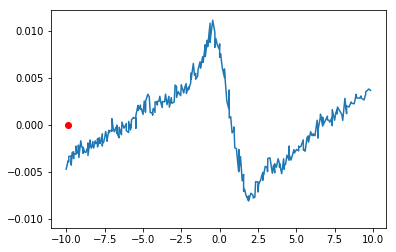

In [11]:
chan_1_no_lin, chan_2_no_lin = zip(*mod_no_linear_trend_list[0][0])
plt.scatter(chan_1_no_lin[mod_no_linear_trend_list[0][3]], 0, color='red')
#plt.scatter(mod_no_linear_trend_list[0][4], 0, color='red')
plt.plot(chan_1_no_lin, chan_2_no_lin)
print(len(chan_2_no_lin))
plt.show()

15


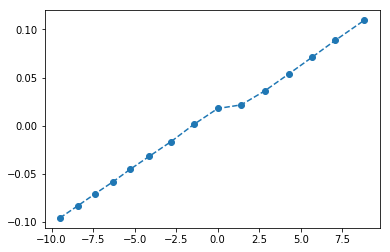

In [15]:
chan_1, chan_2 = zip(*mod_DataSheets[0].combined_set)
plt.plot(chan_1, chan_2, 'o--')
#plt.scatter(chan_1[mod_no_linear_trend_list[0][3]], 0, color='red')
#plt.scatter(mod_no_linear_trend_list[0][4], 0, color='red')
print(len(chan_2))
plt.show()

## Need to fix linear trend subtraction routine. idx_zero is wrong way to think about it bc flat region may not be at zero.